# Example usage

This notebook is a simple demonstration of how to use the package. We generate random data and apply the two function implemented `crr` and `cuminc`.

# Calling `crr` (fitting the model) and display the summary

## Data generation

This is the same process as described in the original package manual https://cran.r-project.org/web/packages/cmprsk/cmprsk.pdf



In [1]:
import numpy as np
import pandas as pd
import pytest
import random
import string


def get_data():
    np.random.seed(42)
    random.seed(34)
    ftime = np.random.exponential(size=200)
    fstatus = pd.Series(np.random.randint(0, 3, 200))
    x2 = np.random.exponential(size=200)
    x3 = np.random.randn(200)
    x1 = [random.choice(string.ascii_lowercase[:4]) for _ in range(200)]
    x4 = np.random.randint(0, 5, 200).astype(int)
    return pd.DataFrame(dict(ftime=ftime, fstatus=fstatus, x1=x1, x2=x2, x3=x3, x4=x4))

test_data = get_data()
test_data



,ftime,fstatus,x1,x2,x3,x4
0,0.469268,2,c,0.642785,-1.067620,2
1,3.010121,0,a,0.102957,-0.142379,2
2,1.316746,1,b,0.676518,0.120296,4
3,0.912943,1,a,0.641450,0.514439,3
4,0.169625,2,d,0.190195,0.711615,2
...,...,...,...,...,...,...
195,0.429568,0,d,0.810652,-0.922165,0
196,1.294465,1,c,1.465283,0.869606,1
197,2.274097,1,c,2.896172,1.355638,3
198,2.181133,1,c,1.894772,0.413435,4


In [2]:
import sys
sys.path.append('/Users/omribahattreidel/dev/cmprsk')

import cmprsk.cmprsk as rsk
import cmprsk.utils as utils

Converting categorical variables to `one hot enoded`

In [3]:
cov_1 = utils.as_indicators(test_data[['x1', 'x2', 'x3', 'x4']], ['x1', 'x4'], bases=['d', 4])
cov_1

,x2,x3,x1_a,x1_b,x1_c,x4_0,x4_1,x4_2,x4_3
0,0.642785,-1.067620,0,0,1,0,0,1,0
1,0.102957,-0.142379,1,0,0,0,0,1,0
2,0.676518,0.120296,0,1,0,0,0,0,0
3,0.641450,0.514439,1,0,0,0,0,0,1
4,0.190195,0.711615,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
195,0.810652,-0.922165,0,0,0,1,0,0,0
196,1.465283,0.869606,0,0,1,0,1,0,0
197,2.896172,1.355638,0,0,1,0,0,0,1
198,1.894772,0.413435,0,0,1,0,0,0,0


Fitting the model

In [4]:
crr_result = rsk.crr(test_data['ftime'], test_data['fstatus'], cov_1)
crr_result.summary

/Users/omribahattreidel/dev/cmprsk/cmprsk/rpy_utils.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return dict(zip(r_list.names, map(np.array, r_list)))


,coefficients,std,hazard_ratio,hazard_ratio_2.5%,hazard_ratio_97.5%,p_values
names,,,,,,
x2,-0.168552,0.106977,0.844887,0.685078,1.041976,0.115119
x3,0.160679,0.120337,1.174308,0.927579,1.486664,0.181797
x1_a,0.487678,0.340173,1.628531,0.836065,3.172139,0.151682
x1_b,0.414615,0.354255,1.513787,0.756002,3.031146,0.241846
x1_c,0.591534,0.328866,1.806757,0.948350,3.442159,0.072065
x4_0,-0.099541,0.370914,0.905253,0.437570,1.872804,0.788418
x4_1,-0.020938,0.333723,0.979279,0.509145,1.883527,0.949972
x4_2,-0.251115,0.379710,0.777933,0.369600,1.637389,0.508398
x4_3,0.038192,0.353991,1.038931,0.519121,2.079240,0.914082


Access other attributs of interest:

In [5]:
crr_result.coefficients



array([-0.16855227,  0.16067881,  0.48767841,  0.41461457,  0.59153363,
       -0.09954065, -0.02093822, -0.25111537,  0.03819242])

In [6]:
crr_result.hazard_ratio()

(array([0.8448871 , 1.17430773, 1.62853105, 1.51378716, 1.8067572 ,
        0.90525315, 0.97927947, 0.77793261, 1.03893113]),
 array([[0.68507752, 1.04197581],
        [0.92757936, 1.48666379],
        [0.83606462, 3.17213923],
        [0.75600176, 3.03114583],
        [0.94835013, 3.44215862],
        [0.43757025, 1.87280385],
        [0.50914505, 1.88352665],
        [0.36960019, 1.63738862],
        [0.51912138, 2.07923993]]))

In [7]:
crr_result.p_values

array([0.11511939, 0.18179688, 0.15168166, 0.24184566, 0.07206485,
       0.78841751, 0.94997243, 0.5083978 , 0.91408224])

# Usage of `cuminc` and plotting

In [8]:
import random
np.random.seed(2)
random.seed(2)
N = 200
ftime = np.random.exponential(size=N)
group = np.array(random.choices(['a', 'b', 'c'], k=N), dtype=str)
fstatus = pd.Series(np.random.randint(0, 3, N))
strata = np.random.randint(1, 3, N)
subset = np.random.randint(0, 2, N).astype(bool)

cuminc_res = rsk.cuminc(ftime, fstatus, group=group)

## Plot cumulative incidence  

This corresponds to `plot.cuminc` - Create Labeled Cumulative Incidence Plots

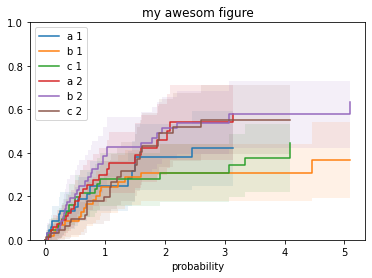

In [9]:
import matplotlib.pyplot as plt


_, ax = plt.subplots()
for name, group in cuminc_res.groups.items():
    ax.plot(group.time, group.est, label=name)
    ax.fill_between(group.time, group.low_ci, group.high_ci, alpha=0.1)
    
ax.set_ylim([0, 1])
ax.legend()
ax.set_title('my awesom figure')
ax.set_xlabel('time')
ax.set_xlabel('probability')
plt.show()

access additional attributes:

In [10]:
cuminc_res.stats

,stat,pv,df
0,1.304507,0.520871,2.0
1,0.961734,0.618247,2.0


In [11]:
cuminc_res.print

Tests:
       stat        pv df
1 1.3045074 0.5208706  2
2 0.9617335 0.6182473  2
Estimates and Variances:
$est
            1         2         3         4         5
a 1 0.2490592 0.3811472 0.4207737        NA        NA
b 1 0.2424685 0.3089696 0.3089696 0.3089696 0.3659704
c 1 0.2786139 0.3076255 0.3076255 0.3772533        NA
a 2 0.2980674 0.4603470 0.5395999        NA        NA
b 2 0.3859081 0.5136944 0.5390281 0.5770287 0.5770287
c 2 0.1989871 0.4892935 0.5531190 0.5531190        NA

$var
              1           2           3           4           5
a 1 0.003303929 0.005899165 0.007347843          NA          NA
b 1 0.003556921 0.004360273 0.004360273 0.004360273 0.007603968
c 1 0.003730227 0.004340781 0.004340781 0.006116843          NA
a 2 0.003929983 0.006717567 0.007385561          NA          NA
b 2 0.004555443 0.005159481 0.005286513 0.005927992 0.005927992
c 2 0.003044332 0.006140341 0.006340917 0.006340917          NA


